In [147]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [148]:
path='/Users/s153121/Documents/UU/Atmospheric Composition and Chemical Processes/CH4 experiment/'
df=pd.read_excel(path+'2020-11-12_Isodat_Emma-Ina.xlsx')
df_gas_signatures=pd.read_excel(path+'Global_Gas_Geochemistry_Inventory_2017.xlsx', sheet_name='Fossil Fuel Data')
df_nonfossil_signatures=pd.read_excel(path+'Global_Gas_Geochemistry_Inventory_2017.xlsx', sheet_name='Non-Fossil Data')
df_memo2=pd.read_excel(path+'MEMO2_all-signatures_combined.xlsx') 

In [149]:
##################### INITIALISATION #################
######################################################

#Parameters
C_IS = -48.07         # delta_WS,IS 13C
D_IS = -88.31         # delta_WS,IS 2H
chi_sample = 1970.0   # [ppb] concentration International standard

dD_V_ws= 60           # [ml] 2H volume working standard 
dC_V_ws = 40          # [ml] 13C volume working standard 
names =['#0 background','#1 background','#2 canal','#3 canal','#4 pond','#5 pond','#6 car','#7 sheep','#8 trash','#9 trash','#10 Ina','#11 Ina','#12 Emma','#13 Emma']

# Preparation of arrays
d13C_values = np.zeros((14,2))
d13C_area = np.zeros((14,2))
dD_values = np.zeros((14,2))
dD_area = np.zeros((14,2))

d13C_V = np.zeros((14))
dD_V = np.zeros((14))

d13C_WS = np.zeros((14))
d13C_area_WS = np.zeros((14))
dD_WS = np.zeros((14))
dD_area_WS = np.zeros((14))

d13C_IS = np.zeros((14,2))
dD_IS = np.zeros((14,2))
d13C_chi = np.zeros((14,2))
dD_chi = np.zeros((14,2))

signature_x = np.zeros((8))
signature_y = np.zeros((8))

##################### COMPUTATION #####################
#######################################################

def sample_IS(X_sample,X_WS,X_IS):                   
    X_SampleWS = (X_sample-X_WS)/(X_WS+1000)*1000
    X_sampleIS = X_SampleWS+X_IS+(X_SampleWS*X_IS)/1000
    return X_sampleIS

def func_chi(A_sample, A_ws, V_sample, V_ws):
    chi = A_sample*chi_sample*V_ws/(A_ws*V_sample)
    return chi

In [150]:
# delta 13C values: sample and WS

d13C_values[0,0] = df.loc[[269],['d 13C/12C']].values[0]
d13C_values[0,1] = df.loc[[277],['d 13C/12C']].values[0]
d13C_WS[0] = df.loc[[285],['d 13C/12C']].values[0]
d13C_area[0,0] = df.loc[[269],['Area All']].values[0]
d13C_area[0,1] = df.loc[[277],['Area All']].values[0]
d13C_V[0] = df.loc[[269],['Comment']].values[0]
d13C_area_WS[0] = df.loc[[285],['Area All']].values[0]

d13C_values[1,0] = df.loc[[172],['d 13C/12C']].values[0]
d13C_values[1,1] = df.loc[[180],['d 13C/12C']].values[0]
d13C_WS[1] = df.loc[[188],['d 13C/12C']].values[0]
d13C_area[1,0] = df.loc[[172],['Area All']].values[0]
d13C_area[1,1] = df.loc[[180],['Area All']].values[0]
d13C_V[1] = df.loc[[172],['Comment']].values[0]
d13C_area_WS[1] = df.loc[[188],['Area All']].values[0]

d13C_values[2,0] = df.loc[[60],['d 13C/12C']].values[0]
d13C_values[2,1] = df.loc[[68],['d 13C/12C']].values[0]
d13C_WS[2] = df.loc[[76],['d 13C/12C']].values[0]
d13C_area[2,0] = df.loc[[60],['Area All']].values[0]
d13C_area[2,1] = df.loc[[68],['Area All']].values[0]
d13C_V[2] = df.loc[[60],['Comment']].values[0]
d13C_area_WS[2] = df.loc[[76],['Area All']].values[0]

d13C_values[3,0] = df.loc[[156],['d 13C/12C']].values[0]
d13C_values[3,1] = df.loc[[164],['d 13C/12C']].values[0]
d13C_WS[3] = df.loc[[148],['d 13C/12C']].values[0]
d13C_area[3,0] = df.loc[[156],['Area All']].values[0]
d13C_area[3,1] = df.loc[[164],['Area All']].values[0]
d13C_V[3] = df.loc[[156],['Comment']].values[0]
d13C_area_WS[3] = df.loc[[148],['Area All']].values[0]

d13C_values[4,0] = df.loc[[212],['d 13C/12C']].values[0]
d13C_WS[4] = df.loc[[204],['d 13C/12C']].values[0]
d13C_area[4,0] = df.loc[[212],['Area All']].values[0]
d13C_V[4] = df.loc[[212],['Comment']].values[0]
d13C_area_WS[4] = df.loc[[204],['Area All']].values[0]
#Note that there is no [4,1]

d13C_values[5,0] = df.loc[[253],['d 13C/12C']].values[0]
d13C_values[5,1] = df.loc[[261],['d 13C/12C']].values[0]
d13C_WS[5] = df.loc[[245],['d 13C/12C']].values[0]
d13C_area[5,0] = df.loc[[253],['Area All']].values[0]
d13C_area[5,1] = df.loc[[261],['Area All']].values[0]
d13C_V[5] = df.loc[[253],['Comment']].values[0]
d13C_area_WS[5] = df.loc[[245],['Area All']].values[0]

d13C_values[6,0] = df.loc[[489], ['d 13C/12C']].values[0]
d13C_values[6,1] = df.loc[[497], ['d 13C/12C']].values[0]
d13C_WS[6] = df.loc[[481], ['d 13C/12C']].values[0]
d13C_area[6,0] = df.loc[[489],['Area All']].values[0]
d13C_area[6,1] = df.loc[[497],['Area All']].values[0]
d13C_V[6] = df.loc[[489],['Comment']].values[0]
d13C_area_WS[6] = df.loc[[481],['Area All']].values[0]

d13C_values[7,0] = df.loc[[116],['d 13C/12C']].values[0]
d13C_values[7,1] = df.loc[[124],['d 13C/12C']].values[0]
d13C_WS[7] = df.loc[[132],['d 13C/12C']].values[0]
d13C_area[7,0] = df.loc[[116],['Area All']].values[0]
d13C_area[7,1] = df.loc[[124],['Area All']].values[0]
d13C_V[7] = df.loc[[116],['Comment']].values[0]
d13C_area_WS[7] = df.loc[[132],['Area All']].values[0]

d13C_values[8,0] = df.loc[[100],['d 13C/12C']].values[0]
d13C_values[8,1] = df.loc[[108],['d 13C/12C']].values[0]
d13C_WS[8] = df.loc[[92],['d 13C/12C']].values[0]
d13C_area[8,0] = df.loc[[100],['Area All']].values[0]
d13C_area[8,1] = df.loc[[108],['Area All']].values[0]
d13C_V[8] = df.loc[[100],['Comment']].values[0]
d13C_area_WS[8] = df.loc[[92],['Area All']].values[0]

d13C_values[9,0] = df.loc[[44],['d 13C/12C']].values[0]
d13C_values[9,1] = df.loc[[52],['d 13C/12C']].values[0]
d13C_WS[9] = df.loc[[36],['d 13C/12C']].values[0]
d13C_area[9,0] = df.loc[[44],['Area All']].values[0]
d13C_area[9,1] = df.loc[[52],['Area All']].values[0]
d13C_V[9] = df.loc[[44],['Comment']].values[0]
d13C_area_WS[9] = df.loc[[36],['Area All']].values[0]

d13C_values[10,0] = 0
d13C_values[10,1] = 0
d13C_WS[10] = 0
d13C_area[10,0] = 0
d13C_area[10,1] = 0
d13C_V[10] = 0
d13C_area_WS[10] = 0

d13C_values[11,0] = 0
d13C_values[11,1] = 0
d13C_WS[11] = 0
d13C_area[11,0] = 0
d13C_area[11,1] = 0
d13C_V[11] = 0
d13C_area_WS[1] = 0

d13C_values[12,0] = df.loc[[351],['d 13C/12C']].values[0]
d13C_values[12,1] = df.loc[[359],['d 13C/12C']].values[0]
d13C_WS[12] = df.loc[[368],['d 13C/12C']].values[0]
d13C_area[12,0] = df.loc[[351],['Area All']].values[0]
d13C_area[12,1] = df.loc[[359],['Area All']].values[0]
d13C_V[12] = df.loc[[351],['Comment']].values[0]
d13C_area_WS[12] = df.loc[[368],['Area All']].values[0]

d13C_values[13,0] = df.loc[[392],['d 13C/12C']].values[0]
d13C_values[13,1] = df.loc[[401],['d 13C/12C']].values[0]
d13C_WS[13] = df.loc[[384],['d 13C/12C']].values[0]
d13C_area[13,0] = df.loc[[392],['Area All']].values[0]
d13C_area[13,1] = df.loc[[401],['Area All']].values[0]
d13C_V[13] = df.loc[[392],['Comment']].values[0]
d13C_area_WS[13] = df.loc[[384],['Area All']].values[0]

In [151]:
# delta D values: sample and WS
dD_values[0,0] = df.loc[[264],['d 2H/1H']].values[0]
dD_values[0,1] = df.loc[[272],['d 2H/1H']].values[0]
dD_WS[0] = df.loc[[280],['d 2H/1H']].values[0]
dD_area[0,0] = df.loc[[264],['Area All']].values[0]
dD_area[0,1] = df.loc[[272],['Area All']].values[0]
dD_V[0] = df.loc[[264],['Comment']].values[0]
dD_area_WS[0] = df.loc[[280],['Area All']].values[0]

dD_values[1,0] = df.loc[[167],['d 2H/1H']].values[0]
dD_values[1,1] = df.loc[[175],['d 2H/1H']].values[0]
dD_WS[1] = df.loc[[183],['d 2H/1H']].values[0]
dD_area[1,0] = df.loc[[167],['Area All']].values[0]
dD_area[1,1] = df.loc[[175],['Area All']].values[0]
dD_V[1] = df.loc[[167],['Comment']].values[0]
dD_area_WS[1] = df.loc[[183],['Area All']].values[0]

dD_values[2,0] = df.loc[[55],['d 2H/1H']].values[0]
dD_values[2,1] = df.loc[[63],['d 2H/1H']].values[0]
dD_WS[2] = df.loc[[71],['d 2H/1H']].values[0]
dD_area[2,0] = df.loc[[55],['Area All']].values[0]
dD_area[2,1] = df.loc[[63],['Area All']].values[0]
dD_V[2] = df.loc[[55],['Comment']].values[0]
dD_area_WS[2] = df.loc[[71],['Area All']].values[0]

dD_values[3,0] = df.loc[[151],['d 2H/1H']].values[0]
dD_values[3,1] = df.loc[[159],['d 2H/1H']].values[0]
dD_WS[3] = df.loc[[143],['d 2H/1H']].values[0]
dD_area[3,0] = df.loc[[151],['Area All']].values[0]
dD_area[3,1] = df.loc[159,['Area All']].values[0]
dD_V[3] = df.loc[[151],['Comment']].values[0]
dD_area_WS[3] = df.loc[[143],['Area All']].values[0]

dD_values[4,0] = df.loc[[207],['d 2H/1H']].values[0]
dD_values[4,1] = df.loc[[215],['d 2H/1H']].values[0]        
dD_WS[4] = df.loc[[199],['d 2H/1H']].values[0]
dD_area[4,0] = df.loc[[207],['Area All']].values[0]
dD_area[4,1] = df.loc[[215],['Area All']].values[0]
dD_V[4] = df.loc[[207],['Comment']].values[0]
dD_area_WS[4] = df.loc[[199],['Area All']].values[0]

dD_values[5,0] = df.loc[[248],['d 2H/1H']].values[0]
dD_values[5,1] = df.loc[[256],['d 2H/1H']].values[0]
dD_WS[5] = df.loc[[240],['d 2H/1H']].values[0]
dD_area[5,0] = df.loc[[248],['Area All']].values[0]
dD_area[5,1] = df.loc[[256],['Area All']].values[0]
dD_V[5] = df.loc[[248],['Comment']].values[0]
dD_area_WS[5] = df.loc[[240],['Area All']].values[0]

dD_values[6,0] = df.loc[[484],['d 2H/1H']].values[0]
dD_values[6,1] = df.loc[[492],['d 2H/1H']].values[0]
dD_WS[6] = df.loc[[476], ['d 2H/1H']].values[0]
dD_area[6,0] = df.loc[[484],['Area All']].values[0]
dD_area[6,1] = df.loc[[492],['Area All']].values[0]
dD_V[6] = df.loc[[484],['Comment']].values[0]
dD_area_WS[6] = df.loc[[476],['Comment']].values[0]

dD_values[7,0] = df.loc[[111],['d 2H/1H']].values[0]
dD_values[7,1] = df.loc[[119],['d 2H/1H']].values[0]
dD_WS[7] = df.loc[[127],['d 2H/1H']].values[0]
dD_area[7,0] = df.loc[[111],['Area All']].values[0]
dD_area[7,1] = df.loc[[119],['Area All']].values[0]
dD_V[7] = df.loc[[111],['Comment']].values[0]
dD_area_WS[7] = df.loc[[127],['Area All']].values[0]

dD_values[8,0] = df.loc[[95],['d 2H/1H']].values[0]
dD_values[8,1] = df.loc[[103],['d 2H/1H']].values[0]
dD_WS[8] = df.loc[[87],['d 2H/1H']].values[0]
dD_area[8,0] = df.loc[[95],['Area All']].values[0]
dD_area[8,1] = df.loc[[103],['Area All']].values[0]
dD_V[8] = df.loc[[95],['Comment']].values[0]
dD_area_WS[8] = df.loc[[87],['Area All']].values[0]

dD_values[9,0] = df.loc[[39],['d 2H/1H']].values[0]
dD_values[9,1] = df.loc[[47],['d 2H/1H']].values[0]
dD_WS[9] = df.loc[[31],['d 2H/1H']].values[0]
dD_area[9,0] = df.loc[[39],['Area All']].values[0]
dD_area[9,1] = df.loc[[47],['Area All']].values[0]
dD_V[9] = df.loc[[39],['Comment']].values[0]
dD_area_WS[9] = df.loc[[31],['Area All']].values[0]

dD_values[10,0] = 0
dD_values[10,1] = 0
dD_WS[10] = 0
dD_area[10,0] = 0
dD_area[10,1] = 0
dD_V[10] = 0
dD_area_WS[10] = 0

dD_values[11,0] = 0
dD_values[11,1] = 0
dD_WS[11]=0

dD_values[12,0] = df.loc[[346],['d 2H/1H']].values[0]
dD_values[12,1] = df.loc[[354],['d 2H/1H']].values[0]
dD_WS[12] = df.loc[[363],['d 2H/1H']].values[0]
dD_area[12,0] = df.loc[[346],['Area All']].values[0]
dD_area[12,1] = df.loc[[354],['Area All']].values[0]
dD_V[12] = df.loc[[346],['Comment']].values[0]
dD_area_WS[12] = df.loc[[363],['Area All']].values[0]

dD_values[13,0] = df.loc[[387],['d 2H/1H']].values[0]
dD_values[13,1] = df.loc[[396],['d 2H/1H']].values[0]
dD_WS[13] = df.loc[[379],['d 2H/1H']].values[0]
dD_area[13,0] = df.loc[[387],['Area All']].values[0]
dD_area[13,1] = df.loc[[396],['Area All']].values[0]
dD_V[13] = df.loc[[387],['Comment']].values[0]
dD_area_WS[13] = df.loc[[379],['Area All']].values[0]

In [152]:
############# RESULTS ####################
##########################################
for i in range(len(d13C_IS)):             # calculate isotopic signatures
    for j in range(2):
        d13C_IS[i,j] = sample_IS(d13C_values[i,j],d13C_WS[i],C_IS)
        dD_IS[i,j] = sample_IS(dD_values[i,j],dD_WS[i],D_IS)
        d13C_chi[i,j] = func_chi(d13C_area[i,j],d13C_area_WS[i],d13C_V[i],dC_V_ws)
        dD_chi[i,j] = func_chi(dD_area[i,j],dD_area_WS[i],dD_V[i],dD_V_ws)
        
df = pd.DataFrame(data=d13C_IS,columns=['d13C_1', 'd13C_2'])   # put results into dataframe
df['dD_1'] = pd.Series(dD_IS[:,0])
df['dD_2'] = pd.Series(dD_IS[:,1])
df['d13Cchi_1'] = pd.Series(d13C_chi[:,0])
df['d13Cchi_2'] = pd.Series(d13C_chi[:,1])
df['dDchi_1'] = pd.Series(dD_chi[:,0])
df['dDchi_2'] = pd.Series(dD_chi[:,1])
df['Names'] = pd.Series(names)

C:\Users\s153121\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\s153121\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars


In [153]:
df

,d13C_1,d13C_2,dD_1,dD_2,d13Cchi_1,d13Cchi_2,dDchi_1,dDchi_2,Names
0,-50.204939,-50.106034,-120.978238,-124.038837,2.339325e+03,2.358358e+03,2391.129795,2383.587935,#0 background
1,-50.111885,-50.567191,-103.222744,-104.892567,inf,inf,2384.451369,2376.277095,#1 background
2,-53.043122,-53.003185,-156.598286,-159.307144,3.648989e+03,3.628930e+03,7337.827548,7185.636336,#2 canal
3,-56.168455,-56.071700,-192.032253,-188.887963,1.101759e+04,1.049014e+04,9477.800012,9588.251847,#3 canal
4,-57.383190,-1.694727,-191.342531,-193.146746,3.590451e+03,0.000000e+00,3708.327642,3643.146529,#4 pond
5,-53.770634,-53.776625,-224.985261,-229.478641,5.575840e+03,5.571034e+03,5319.091954,5368.921573,#5 pond
6,-13.006511,-13.041462,-150.559980,-152.585560,2.638054e+03,2.638368e+03,250.440190,250.645398,#6 car
7,-50.055070,-50.797974,-139.645478,-141.346097,2.558205e+03,2.471002e+03,2569.223507,2567.374866,#7 sheep
8,-58.240862,-58.523386,-179.510027,-182.395987,3.359147e+03,3.383513e+03,3439.881221,3390.671639,#8 trash
9,-60.808811,-60.736897,-201.621308,-200.455594,3.855900e+03,3.824264e+03,7912.361791,7879.100298,#9 trash


# Keeling plot Trash (8 and 9)

slope: 50957.196298    intercept: -73.791982   std_err: 1592.617538
R-squared: 0.997078
-57.8038074724458
50957.196298350085


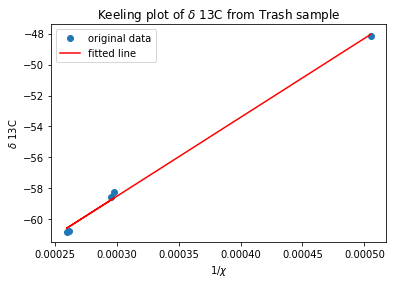

In [260]:
#Keeling plot for #8 and #9 trash 13C
D_b = -88.56
C13_b = -48.13
Chi_b = 1978.94

yd_b = C13_b
yd_S1 = d13C_IS[9,0]
yd_S2 = d13C_IS[9,1]
yd_S3 = d13C_IS[8,0]
yd_S4 = d13C_IS[8,1]

xd_b = 1/Chi_b
xd_S1 = 1/d13C_chi[9,0]
xd_S2 = 1/d13C_chi[9,1]
xd_S3 = 1/d13C_chi[8,0]
xd_S4 = 1/d13C_chi[8,1]

x=np.array([xd_b, xd_S1, xd_S2, xd_S3, xd_S4])
y=np.array([yd_b, yd_S1, yd_S2, yd_S3, yd_S4])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f   std_err: %f" % (slope, intercept, std_err))
print("R-squared: %f" % r_value**2)
Sxy = (x*y).sum()
Sxx = (x**2).sum()
Sx = sum(x)
Sy = sum(y)
n = len(x)
sd_slope = (n*Sxy - Sx*Sy)/(n*Sxx - Sx**2)
sd_intercept = Sy/n - std_err*Sx/n
print(sd_intercept)
print(sd_slope)

#Std_err is standard deviation of the slope

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ 13C')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ 13C from Trash sample')
plt.legend()
plt.show()

slope: 282561.426415    intercept: -246.475682
R-squared: 0.884485


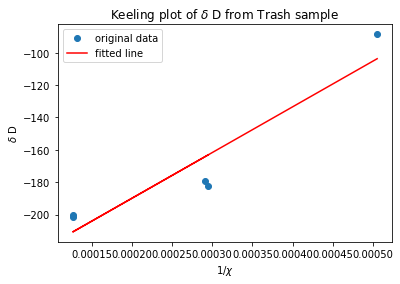

In [155]:
#Keeling plot for #8 and #9 trash D2
yd_b = D_b
yd_S1 = dD_IS[9,0]
yd_S2 = dD_IS[9,1]
yd_S3 = dD_IS[8,0]
yd_S4 = dD_IS[8,1]

xd_b = 1/1978.94
xd_S1 = 1/dD_chi[9,0]
xd_S2 = 1/dD_chi[9,1]
xd_S3 = 1/dD_chi[8,0]
xd_S4 = 1/dD_chi[8,1]

x=np.array([xd_b, xd_S1, xd_S2, xd_S3, xd_S4])
y=np.array([yd_b, yd_S1, yd_S2, yd_S3, yd_S4])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ D')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ D from Trash sample')
plt.legend()
plt.show()

# Keeling plot Background (0 and 1)

slope: 2297.253524    intercept: -50.447401
R-squared: 0.353317


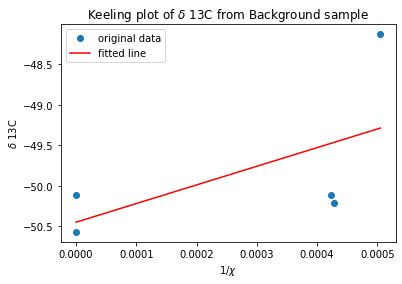

In [156]:
#Keeling plot for #0 and #1 background 13C
D_b = -88.56
C13_b = -48.13
Chi_b = 1978.94

yd_b = C13_b
yd_S1 = d13C_IS[0,0]
yd_S2 = d13C_IS[0,1]
yd_S3 = d13C_IS[1,0]
yd_S4 = d13C_IS[1,1]

xd_b = 1/Chi_b
xd_S1 = 1/d13C_chi[0,0]
xd_S2 = 1/d13C_chi[0,1]
xd_S3 = 1/d13C_chi[1,0]
xd_S4 = 1/d13C_chi[1,1]

x=np.array([xd_b, xd_S1, xd_S2, xd_S3, xd_S4])
y=np.array([yd_b, yd_S1, yd_S2, yd_S3, yd_S4])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ 13C')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ 13C from Background sample')
plt.legend()
plt.show()

slope: 291178.553069    intercept: -235.483282
R-squared: 0.598425


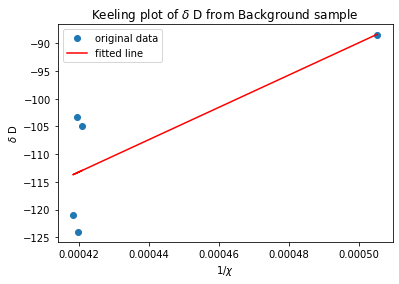

In [157]:
#Keeling plot for #0 and #1 background D
yd_b = D_b
yd_S1 = dD_IS[0,0]
yd_S2 = dD_IS[0,1]
yd_S3 = dD_IS[1,0]
yd_S4 = dD_IS[1,1]

xd_b = 1/1978.94
xd_S1 = 1/dD_chi[0,0]
xd_S2 = 1/dD_chi[0,1]
xd_S3 = 1/dD_chi[1,0]
xd_S4 = 1/dD_chi[1,1]

x=np.array([xd_b, xd_S1, xd_S2, xd_S3, xd_S4])
y=np.array([yd_b, yd_S1, yd_S2, yd_S3, yd_S4])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ D')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ D from Background sample')
plt.legend()
plt.show()

# Keeling plot Canal (2 and 3)

slope: 19184.917131    intercept: -58.045083
R-squared: 0.995020


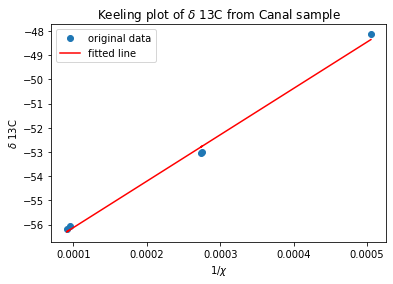

In [158]:
#Keeling plot for #2 and #3 canal 13C
D_b = -88.56
C13_b = -48.13
Chi_b = 1978.94

yd_b = C13_b
yd_S1 = d13C_IS[2,0]
yd_S2 = d13C_IS[2,1]
yd_S3 = d13C_IS[3,0]
yd_S4 = d13C_IS[3,1]

xd_b = 1/Chi_b
xd_S1 = 1/d13C_chi[2,0]
xd_S2 = 1/d13C_chi[2,1]
xd_S3 = 1/d13C_chi[3,0]
xd_S4 = 1/d13C_chi[3,1]

x=np.array([xd_b, xd_S1, xd_S2, xd_S3, xd_S4])
y=np.array([yd_b, yd_S1, yd_S2, yd_S3, yd_S4])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ 13C')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ 13C from Canal sample')
plt.legend()
plt.show()

slope: 229918.411612    intercept: -202.627263
R-squared: 0.907667


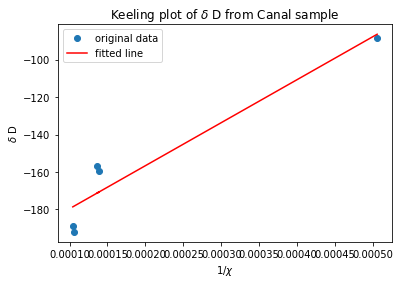

In [159]:
#Keeling plot for #2 and #3 Canal D
yd_b = D_b
yd_S1 = dD_IS[2,0]
yd_S2 = dD_IS[2,1]
yd_S3 = dD_IS[3,0]
yd_S4 = dD_IS[3,1]

xd_b = 1/Chi_b
xd_S1 = 1/dD_chi[2,0]
xd_S2 = 1/dD_chi[2,1]
xd_S3 = 1/dD_chi[3,0]
xd_S4 = 1/dD_chi[3,1]

x=np.array([xd_b, xd_S1, xd_S2, xd_S3, xd_S4])
y=np.array([yd_b, yd_S1, yd_S2, yd_S3, yd_S4])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ D')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ D from Canal sample')
plt.legend()
plt.show()

# Keeling plot Pond (4 and 5)

slope: 17854.697238    intercept: -58.365675
R-squared: 0.515318


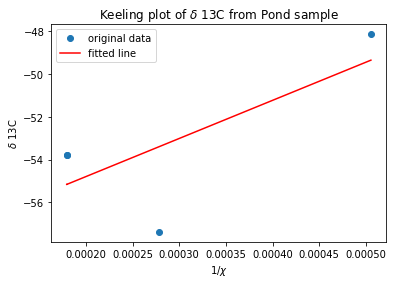

In [160]:
D_b = -88.56
C13_b = -48.13
Chi_b = 1978.94

yd_b = C13_b
yd_S1 = d13C_IS[4,0]
#yd_S2 = d13C_IS[4,1]
yd_S3 = d13C_IS[5,0]
yd_S4 = d13C_IS[5,1]

xd_b = 1/Chi_b
xd_S1 = 1/d13C_chi[4,0]
#xd_S2 = 1/d13C_chi[4,1]
xd_S3 = 1/d13C_chi[5,0]
xd_S4 = 1/d13C_chi[5,1]

x=np.array([xd_b, xd_S1, xd_S3, xd_S4])
y=np.array([yd_b, yd_S1, yd_S3, yd_S4])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ 13C')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ 13C from Pond sample')
plt.legend()
plt.show()

slope: 436479.525245    intercept: -309.788568
R-squared: 0.998496


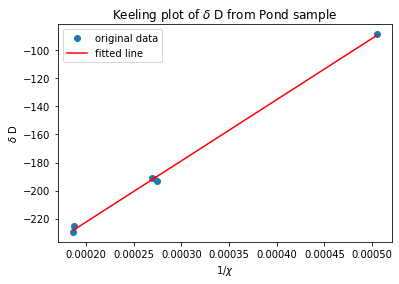

In [161]:
yd_b = D_b
yd_S1 = dD_IS[4,0]
yd_S2 = dD_IS[4,1]
yd_S3 = dD_IS[5,0]
yd_S4 = dD_IS[5,1]

xd_b = 1/Chi_b
xd_S1 = 1/dD_chi[4,0]
xd_S2 = 1/dD_chi[4,1]
xd_S3 = 1/dD_chi[5,0]
xd_S4 = 1/dD_chi[5,1]

x=np.array([xd_b, xd_S1, xd_S2, xd_S3, xd_S4])
y=np.array([yd_b, yd_S1, yd_S2, yd_S3, yd_S4])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ D')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ D from Pond sample')
plt.legend()
plt.show()

# Keeling plot for Car Diluted (6)

slope: -73423.214988    intercept: -11.027705
R-squared: 0.999999


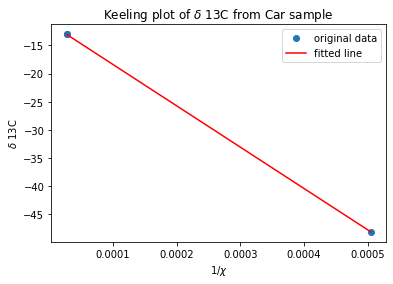

In [201]:
D_b = -88.56
C13_b = -48.13
Chi_b = 1978.94

yd_b = C13_b
yd_S1 = d13C_IS[6,0]
yd_S2 = d13C_IS[6,1]
#yd_S3 = d13C_IS[5,0]
#yd_S4 = d13C_IS[5,1]

xd_b = 1/Chi_b
xd_S1 = 1/36780
xd_S2 = 1/36780
#xd_S1 = 1/d13C_chi[6,0]
#xd_S2 = 1/d13C_chi[6,1]
#xd_S3 = 1/d13C_chi[5,0]
#xd_S4 = 1/d13C_chi[5,1]

x=np.array([xd_b, xd_S1, xd_S2])
y=np.array([yd_b, yd_S1, yd_S2])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ 13C')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ 13C from Car sample')
plt.legend()
plt.show()

slope: 131789.391833    intercept: -155.155951
R-squared: 0.999226


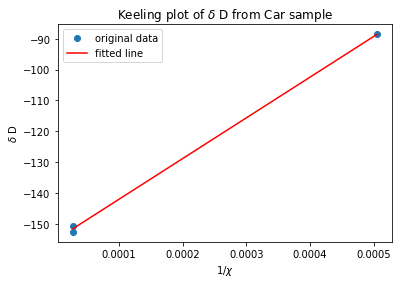

In [202]:
yd_b = D_b
yd_S1 = dD_IS[6,0]
yd_S2 = dD_IS[6,1]
#yd_S3 = dD_IS[5,0]
#yd_S4 = dD_IS[5,1]

xd_b = 1/Chi_b
xd_S1 = 1/36780
xd_S2 = 1/36780
#xd_S1 = 1/dD_chi[6,0]
#xd_S2 = 1/dD_chi[6,1]
#xd_S3 = 1/dD_chi[5,0]
#xd_S4 = 1/dD_chi[5,1]

#Note that the mixing ratio calculated from the peak area is wrong. Mailika send us the mixing ratio of the original sample

x=np.array([xd_b, xd_S1, xd_S2])
y=np.array([yd_b, yd_S1, yd_S2])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ D')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ D from Car sample')
plt.legend()
plt.show()

# Keeling plot for Sheep (7)

slope: 20440.980301    intercept: -58.525002
R-squared: 0.859787


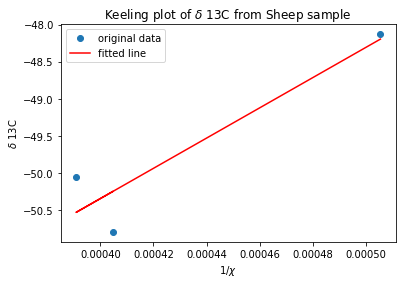

In [164]:
yd_b = C13_b
yd_S1 = d13C_IS[7,0]
yd_S2 = d13C_IS[7,1]
#yd_S3 = d13C_IS[5,0]
#yd_S4 = d13C_IS[5,1]

xd_b = 1/Chi_b
xd_S1 = 1/d13C_chi[7,0]
xd_S2 = 1/d13C_chi[7,1]
#xd_S3 = 1/d13C_chi[5,0]
#xd_S4 = 1/d13C_chi[5,1]

x=np.array([xd_b, xd_S1, xd_S2])
y=np.array([yd_b, yd_S1, yd_S2])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ 13C')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ 13C from Sheep sample')
plt.legend()
plt.show()

slope: 447854.983647    intercept: -314.872749
R-squared: 0.999073


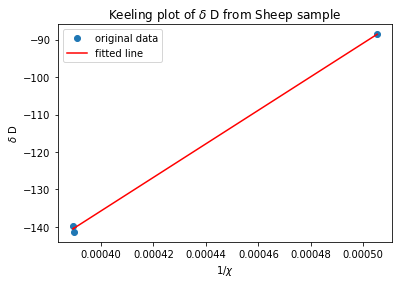

In [165]:
yd_b = D_b
yd_S1 = dD_IS[7,0]
yd_S2 = dD_IS[7,1]
#yd_S3 = dD_IS[5,0]
#yd_S4 = dD_IS[5,1]

xd_b = 1/Chi_b
xd_S1 = 1/dD_chi[7,0]
xd_S2 = 1/dD_chi[7,1]
#xd_S3 = 1/dD_chi[5,0]
#xd_S4 = 1/dD_chi[5,1]

x=np.array([xd_b, xd_S1, xd_S2])
y=np.array([yd_b, yd_S1, yd_S2])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ D')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ D from Sheep sample')
plt.legend()
plt.show()

# Keeling plot for Emma (12 and 13)

slope: 36459.261135    intercept: -66.532891
R-squared: 0.999743


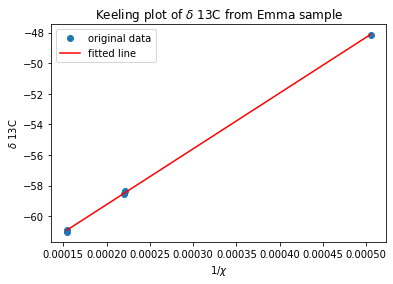

In [166]:
yd_b = C13_b
yd_S1 = d13C_IS[12,0]
yd_S2 = d13C_IS[12,1]
yd_S3 = d13C_IS[13,0]
yd_S4 = d13C_IS[13,1]

xd_b = 1/Chi_b
xd_S1 = 1/d13C_chi[12,0]
xd_S2 = 1/d13C_chi[12,1]
xd_S3 = 1/d13C_chi[13,0]
xd_S4 = 1/d13C_chi[13,1]

x=np.array([xd_b, xd_S1, xd_S2, xd_S3, xd_S4])
y=np.array([yd_b, yd_S1, yd_S2, yd_S3, yd_S4])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ 13C')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ 13C from Emma sample')
plt.legend()
plt.show()

slope: 465610.251528    intercept: -325.581776
R-squared: 0.996625


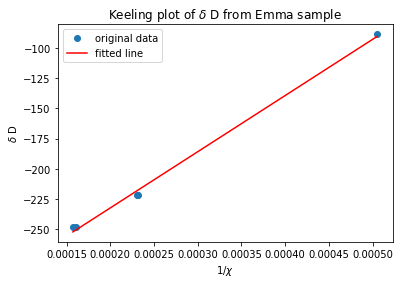

In [167]:
yd_b = D_b
yd_S1 = dD_IS[12,0]
yd_S2 = dD_IS[12,1]
yd_S3 = dD_IS[13,0]
yd_S4 = dD_IS[13,1]

xd_b = 1/Chi_b
xd_S1 = 1/dD_chi[12,0]
xd_S2 = 1/dD_chi[12,1]
xd_S3 = 1/dD_chi[13,0]
xd_S4 = 1/dD_chi[13,1]

x=np.array([xd_b, xd_S1, xd_S2, xd_S3, xd_S4])
y=np.array([yd_b, yd_S1, yd_S2, yd_S3, yd_S4])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.ylabel('$\delta$ D')
plt.xlabel('1/$\chi$')
plt.title('Keeling plot of $\delta$ D from Emma sample')
plt.legend()
plt.show()

# Source signature plot

Text(0.5, 1.0, 'Source Signature Plot')

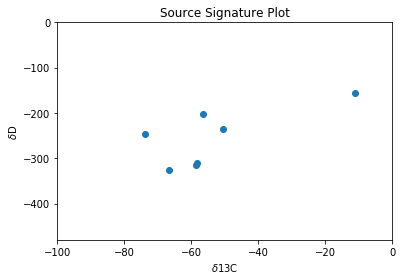

In [168]:
x = np.array([-50.447401, -56.523044, -58.365675, -11.027705, -58.525002, -73.791982, -66.532891])
y = np.array([-235.483282, -202.627263, -309.788568, -155.155951, -314.872749, -246.475682, -325.581776])

plt.scatter(x,y)
plt.axis([-100,0,-480,0])
plt.xlabel('$\delta$13C')
plt.ylabel('$\delta$D')
plt.title('Source Signature Plot')

TO DO:
-Add uncertainties
-Find out how to make a plot as Malika send us
-Make a pretty and clear plot where it is easy to distinguish the origin of the different dots

As it looks now, some are in the microbial fermentation and some in the microbial CO2 reduction scheme. Also, it looks like something is wrong with the diluted car point, it's very far from the rest and positive?!

About the keeling plots, some are very pretty (Emma and Trash) but some have points which lie very far from each other -> ask if this is correct. Also, the Keeling plot for the car is the other way around.

slope: -93161.704408    intercept: -10.491523
R-squared: 0.999982


C:\Users\s153121\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


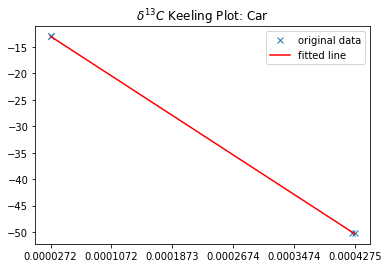

In [212]:
################################################################
#                 d13C - Keeling Plots
################################################################
x_values = np.zeros((24))
y_values = np.zeros((24))

# choose between our and Malika's background -> Use our background for all samples except the sheep because that has a really low concentration
x_background = np.array([1/d13C_chi[0,0], 1/d13C_chi[0,1]]) #, 1/d13C_chi[1,0], 1/d13C_chi[1,1]]) -> leave out #1 because it is infinity
y_background = np.array([d13C_IS[0,0],d13C_IS[0,1]]) #,d13C_IS[1,0],d13C_IS[1,1]])
#x_background = np.array(1/1984.11)     # determined by Malika
#y_background = np.array(-48.13)        # determined by Malika

count=0
for k in range(2,14):
    x_values[count] = 1/d13C_chi[k,0] 
    y_values[count] = d13C_IS[k,0]
    count = count+1
    x_values[count] = 1/d13C_chi[k,1]  
    y_values[count] = d13C_IS[k,1]   
    count = count + 1 
    
x_values_car = np.array([1/36780, 1/36780])
y_values_car = np.array([d13C_IS[6,0], d13C_IS[6,1]])

# canal=1, pond=2, car=3, sheep=4, trash=5, Ina=6, Emma=7
source = 3
if source == 0:
    x=np.array([1/1984.11, 1/d13C_chi[0,0], 1/d13C_chi[0,1], 1/d13C_chi[1,0], 1/d13C_chi[1,1]])
    y=np.array([-48.13, d13C_IS[0,0],d13C_IS[0,1],d13C_IS[1,0],d13C_IS[1,1]])
    title = r'$\delta ^{13}$ Keeling Plot: Background'
elif source == 1:
    x=np.append(x_background, x_values[0:4])
    y=np.append(y_background, y_values[0:4])
    title = r'$\delta^{13}C$ Keeling Plot: Canal'
elif source == 2:
    valid_x = [x_values[4], x_values[6], x_values[7]]
    valid_y = [y_values[4], y_values[6], y_values[7]]
    x=np.append(x_background, valid_x)
    y=np.append(y_background, valid_y)
    title = r'$\delta^{13}C$ Keeling Plot: Pond'
elif source == 3:
    x=np.append(x_background, x_values_car)
    y=np.append(y_background, y_values_car)
    title = r'$\delta^{13}C$ Keeling Plot: Car'
elif source == 4:
    x=np.append(x_background, x_values[10:12])
    y=np.append(y_background, y_values[10:12])
    title = r'$\delta^{13}C$ Keeling Plot: Sheep'
elif source == 5:
    x=np.append(x_background, x_values[12:16])
    y=np.append(y_background, y_values[12:16])
    title = r'$\delta^{13}C$ Keeling Plot: Trash'
elif source == 6:
    x=np.append(x_background, x_values[16:20])
    y=np.append(y_background, y_values[16:20])
    title = r'$\delta^{13}C$ Keeling Plot: Ina'
    print('There are no valid results for this measurement')
    signature_x[source]=np.NaN
elif source == 7:
    x=np.append(x_background, x_values[20:24])
    y=np.append(y_background, y_values[20:24])
    title = r'$\delta^{13}C$ Keeling Plot: Emma'
   
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
signature_x[source]=intercept
plt.plot(x, y, 'x', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title(title)
plt.xticks(np.linspace(min(x), max(x), 6))
plt.legend(loc='best')
plt.show()

slope: 209119.715674    intercept: -200.290951
R-squared: 0.885517


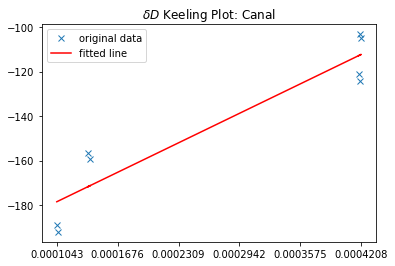

In [213]:
################################################################
#                 dD - Keeling Plots
################################################################

x_values = np.zeros((24))
y_values = np.zeros((24))

# choose between our and Malika's background 
x_background = np.array([1/dD_chi[0,0], 1/dD_chi[0,1], 1/dD_chi[1,0], 1/dD_chi[1,1]])
y_background = np.array([dD_IS[0,0], dD_IS[0,1], dD_IS[1,0], dD_IS[1,1]])
#x_background = np.array(1/1978.94)     # determined by Malika
#y_background = np.array(-88.56)        # determined by Malika

count=0
for k in range(2,14):
    x_values[count] = 1/dD_chi[k,0] 
    y_values[count] = dD_IS[k,0]
    count = count+1
    x_values[count] = 1/dD_chi[k,1]  
    y_values[count] = dD_IS[k,1]   
    count = count + 1 
    
x_values_car = np.array([1/36780, 1/36780])
y_values_car = np.array([dD_IS[6,0], dD_IS[6,1]])

# background= 0, canal=1, pond=2, car=3, sheep=4, trash=5, Ina=6, Emma=7
source = 1
if source == 0:
    x=np.array([1/1978.94, 1/dD_chi[0,0], 1/dD_chi[0,1], 1/dD_chi[1,0], 1/dD_chi[1,1]])
    y=np.array([-88.56, dD_IS[0,0], dD_IS[0,1], dD_IS[1,0], dD_IS[1,1]])
    title = r'$\delta D$ Keeling Plot: Background'
elif source == 1:
    x=np.append(x_background, x_values[0:4])
    y=np.append(y_background, y_values[0:4])
    title = r'$\delta D$ Keeling Plot: Canal'
elif source == 2:
    x=np.append(x_background, x_values[4:8])
    y=np.append(y_background, y_values[4:8])
    title = r'$\delta D$ Keeling Plot: Pond'
elif source == 3:
    x=np.append(x_background, x_values_car)
    y=np.append(y_background, y_values_car)
    title = r'$\delta D$ Keeling Plot: Car'
elif source == 4:
    x=np.append(x_background, x_values[10:12])
    y=np.append(y_background, y_values[10:12])
    title = r'$\delta D$ Keeling Plot: Sheep'
elif source == 5:
    x=np.append(x_background, x_values[12:16])
    y=np.append(y_background, y_values[12:16])
    title = r'$\delta D$ Keeling Plot: Trash'
elif source == 6:
    x=np.append(x_background, x_values[16:20])
    y=np.append(y_background, y_values[16:20])
    title = r'$\delta D$ Keeling Plot: Ina'
    print('There are no valid results for this measurement')
    signature_x[source]=np.NaN
elif source == 7:
    x=np.append(x_background, x_values[20:24])
    y=np.append(y_background, y_values[20:24])
    title = r'$\delta D$ Keeling Plot: Emma'
   
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
signature_y[source]=intercept
plt.plot(x, y, 'x', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title(title)
plt.xticks(np.linspace(min(x), max(x), 6))
plt.legend()
plt.show()

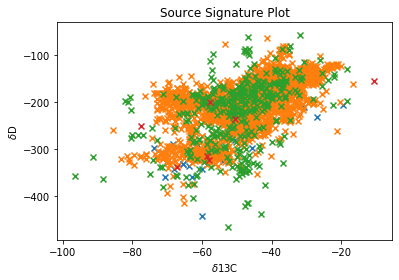

[-50.44590552 -57.83357539 -57.89577839 -10.49152311 -58.61951518
 -77.42524565          nan -67.16246743] [-235.48328173 -200.29095083 -323.57512274 -154.25340711 -314.87274863
 -249.97078788           nan -338.46451029]


In [214]:
################################################################
#                 Source Signature Plot
################################################################
#df_gas_signatures
#df_nonfossil_signatures
#df_memo2

plt.scatter(df_nonfossil_signatures['d13C_CH4_MEAN'].to_numpy(),df_nonfossil_signatures['d2H_CH4_MEAN'].to_numpy(),marker='x')
plt.scatter(df_gas_signatures['d13C_CH4'].to_numpy(),df_gas_signatures['d2H_CH4'].to_numpy(),marker='x')
plt.scatter(df_memo2['Source d13C VPDB [‰]'].to_numpy(),df_memo2['Source dD SMOW [‰]'].to_numpy(),marker='x')
plt.scatter(signature_x,signature_y,marker='x',linewidths=6)
#plt.axis([-100,100,-480,0])
plt.xlabel('$\delta$13C')
plt.ylabel('$\delta$D')
plt.title('Source Signature Plot')
plt.show()

print(signature_x,signature_y)

In [215]:
df_memo2 = df_memo2.sort_values(by=['SNAP certain'])

# check for different source names
minus1 = 'None'
names_memo2 = np.array(minus1)
for index, row in df_memo2.iterrows():
    if row['SNAP certain'] != minus1:
        print(row['SNAP certain'])
        #'row['SNAP certain']' = np.array(df_memo2.loc[[index], ['Source d13C VPDB [‰]']])
        #f = np.append(names_memo2, row['SNAP certain'])
    minus1 = row['SNAP certain']

Agriculture
Agriculture + Waste
Ambient
Fossil fuel
Freshwaters
Oceans
Pyrogenic
Unknown
Waste
Wetlands


In [248]:
######### MEMO-2 data #############

df_Agriculture = df_memo2[df_memo2['SNAP certain'] == 'Agriculture'] 
df_AgricultureWaste = df_memo2[df_memo2['SNAP certain'] == 'Agriculture + Waste'] 
df_Ambient = df_memo2[df_memo2['SNAP certain'] == 'Ambient'] 
df_Fossilfuel = df_memo2[df_memo2['SNAP certain'] == 'Fossil fuel'] 
df_Freshwaters = df_memo2[df_memo2['SNAP certain'] == 'Freshwaters'] 
df_Oceans = df_memo2[df_memo2['SNAP certain'] == 'Oceans'] 
df_Pyrogenic = df_memo2[df_memo2['SNAP certain'] == 'Pyrogenic'] 
df_ROMEO = df_memo2[df_memo2['SNAP certain'] == 'ROMEO'] 
df_Unknown = df_memo2[df_memo2['SNAP certain'] == 'Unknown'] 
df_Waste = df_memo2[df_memo2['SNAP certain'] == 'Waste'] 
df_Wetlands = df_memo2[df_memo2['SNAP certain'] == 'Wetlands']

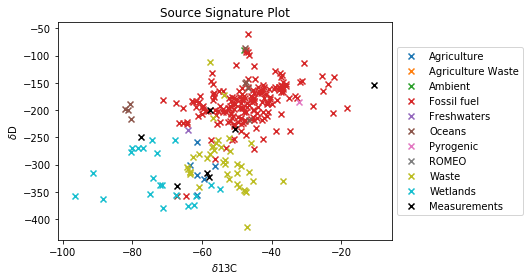

In [249]:
plt.scatter(df_Agriculture['Source d13C VPDB [‰]'].to_numpy(),df_Agriculture['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Agriculture')
plt.scatter(df_AgricultureWaste['Source d13C VPDB [‰]'].to_numpy(),df_AgricultureWaste['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Agriculture Waste')
plt.scatter(df_Ambient['Source d13C VPDB [‰]'].to_numpy(),df_Ambient['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Ambient')
plt.scatter(df_Fossilfuel['Source d13C VPDB [‰]'].to_numpy(),df_Fossilfuel['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Fossil fuel')
plt.scatter(df_Freshwaters['Source d13C VPDB [‰]'].to_numpy(),df_Freshwaters['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Freshwaters')
plt.scatter(df_Oceans['Source d13C VPDB [‰]'].to_numpy(),df_Oceans['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Oceans')
plt.scatter(df_Pyrogenic['Source d13C VPDB [‰]'].to_numpy(),df_Pyrogenic['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Pyrogenic')
plt.scatter(df_ROMEO['Source d13C VPDB [‰]'].to_numpy(),df_ROMEO['Source dD SMOW [‰]'].to_numpy(),marker='x',label='ROMEO')
plt.scatter(df_Waste['Source d13C VPDB [‰]'].to_numpy(),df_Waste['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Waste')
plt.scatter(df_Wetlands['Source d13C VPDB [‰]'].to_numpy(),df_Wetlands['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Wetlands')
plt.scatter(signature_x,signature_y,marker='x',linewidths=10,c='black',label='Measurements')
#plt.axis([-100,100,-480,0])
plt.xlabel('$\delta$13C')
plt.ylabel('$\delta$D')
plt.title('Source Signature Plot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [250]:
############# Global Gas Geochemical data ###########

df_RicePaddies = df_nonfossil_signatures[df_nonfossil_signatures['Category'] == 'rice paddies']
df_Waste2 = df_nonfossil_signatures[df_nonfossil_signatures['Category'] == 'waste'] 
df_Ruminants = df_nonfossil_signatures[df_nonfossil_signatures['Category'] == 'ruminants'] 
df_Wetlands2 = df_nonfossil_signatures[df_nonfossil_signatures['Category'] == 'wetlands'] 
df_BiomassBurning = df_nonfossil_signatures[df_nonfossil_signatures['Category'] == 'biomass burning']
df_Termites = df_nonfossil_signatures[df_nonfossil_signatures['Category'] == 'termites'] 
df_Conventional = df_gas_signatures[df_gas_signatures['TYPE'] == 'conventional'] 
df_Coal = df_gas_signatures[df_gas_signatures['TYPE'] == 'coal'] 
df_Shale = df_gas_signatures[df_gas_signatures['TYPE'] == 'shale'] 

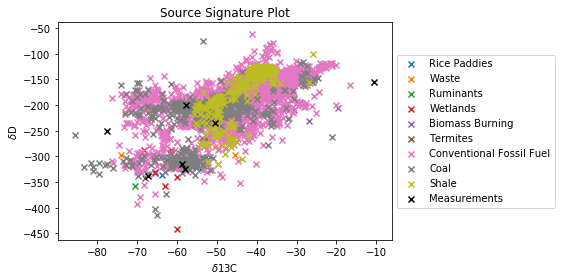

In [251]:
plt.scatter(df_RicePaddies['d13C_CH4_MEAN'].to_numpy(),df_RicePaddies['d2H_CH4_MEAN'].to_numpy(),marker='x',label='Rice Paddies')
plt.scatter(df_Waste2['d13C_CH4_MEAN'].to_numpy(),df_Waste2['d2H_CH4_MEAN'].to_numpy(),marker='x',label='Waste')
plt.scatter(df_Ruminants['d13C_CH4_MEAN'].to_numpy(),df_Ruminants['d2H_CH4_MEAN'].to_numpy(),marker='x',label='Ruminants')
plt.scatter(df_Wetlands2['d13C_CH4_MEAN'].to_numpy(),df_Wetlands2['d2H_CH4_MEAN'].to_numpy(),marker='x',label='Wetlands')
plt.scatter(df_BiomassBurning['d13C_CH4_MEAN'].to_numpy(),df_BiomassBurning['d2H_CH4_MEAN'].to_numpy(),marker='x',label='Biomass Burning')
plt.scatter(df_Termites['d13C_CH4_MEAN'].to_numpy(),df_Termites['d2H_CH4_MEAN'].to_numpy(),marker='x',label='Termites')
plt.scatter(df_Conventional['d13C_CH4'].to_numpy(),df_Conventional['d2H_CH4'].to_numpy(),marker='x',label='Conventional Fossil Fuel')
plt.scatter(df_Coal['d13C_CH4'].to_numpy(),df_Coal['d2H_CH4'].to_numpy(),marker='x',label='Coal')
plt.scatter(df_Shale['d13C_CH4'].to_numpy(),df_Shale['d2H_CH4'].to_numpy(),marker='x',label='Shale')
plt.scatter(signature_x,signature_y,marker='x',linewidths=10,c='black',label='Measurements')
#plt.axis([-100,100,-480,0])
plt.xlabel('$\delta$13C')
plt.ylabel('$\delta$D')
plt.title('Source Signature Plot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

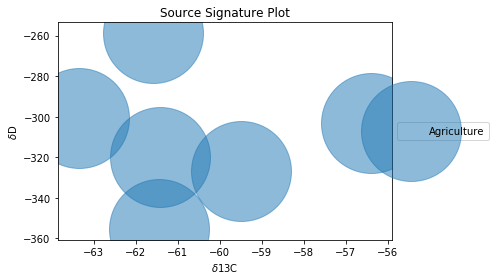

In [270]:
######### Source Signature plot with all sources ############

import matplotlib.patches as patches

#plt.scatter(df_AgricultureWaste['Source d13C VPDB [‰]'].to_numpy(),df_AgricultureWaste['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Agriculture Waste')
#plt.scatter(df_Ambient['Source d13C VPDB [‰]'].to_numpy(),df_Ambient['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Ambient')
#plt.scatter(df_Fossilfuel['Source d13C VPDB [‰]'].to_numpy(),df_Fossilfuel['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Fossil fuel')
#plt.scatter(df_Freshwaters['Source d13C VPDB [‰]'].to_numpy(),df_Freshwaters['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Freshwaters')
#plt.scatter(df_Oceans['Source d13C VPDB [‰]'].to_numpy(),df_Oceans['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Oceans')
#plt.scatter(df_Pyrogenic['Source d13C VPDB [‰]'].to_numpy(),df_Pyrogenic['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Pyrogenic')
#plt.scatter(df_ROMEO['Source d13C VPDB [‰]'].to_numpy(),df_ROMEO['Source dD SMOW [‰]'].to_numpy(),marker='x',label='ROMEO')
#plt.scatter(df_Waste['Source d13C VPDB [‰]'].to_numpy(),df_Waste['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Waste')
#plt.scatter(df_Wetlands['Source d13C VPDB [‰]'].to_numpy(),df_Wetlands['Source dD SMOW [‰]'].to_numpy(),marker='x',label='Wetlands')
#plt.scatter(df_RicePaddies['d13C_CH4_MEAN'].to_numpy(),df_RicePaddies['d2H_CH4_MEAN'].to_numpy(),marker='x',label='Rice Paddies')
#plt.scatter(df_Waste2['d13C_CH4_MEAN'].to_numpy(),df_Waste2['d2H_CH4_MEAN'].to_numpy(),marker='x',label='Waste')
#plt.scatter(df_Ruminants['d13C_CH4_MEAN'].to_numpy(),df_Ruminants['d2H_CH4_MEAN'].to_numpy(),marker='x',label='Ruminants')
#plt.scatter(df_Wetlands2['d13C_CH4_MEAN'].to_numpy(),df_Wetlands2['d2H_CH4_MEAN'].to_numpy(),marker='x',label='Wetlands')
#plt.scatter(df_BiomassBurning['d13C_CH4_MEAN'].to_numpy(),df_BiomassBurning['d2H_CH4_MEAN'].to_numpy(),marker='x',label='Biomass Burning')
#plt.scatter(df_Termites['d13C_CH4_MEAN'].to_numpy(),df_Termites['d2H_CH4_MEAN'].to_numpy(),marker='x',label='Termites')
#plt.scatter(df_Conventional['d13C_CH4'].to_numpy(),df_Conventional['d2H_CH4'].to_numpy(),marker='x',label='Conventional Fossil Fuel')
#plt.scatter(df_Coal['d13C_CH4'].to_numpy(),df_Coal['d2H_CH4'].to_numpy(),marker='x',label='Coal')
#plt.scatter(df_Shale['d13C_CH4'].to_numpy(),df_Shale['d2H_CH4'].to_numpy(),marker='x',label='Shale')
#plt.scatter(signature_x,signature_y,marker='x',linewidths=10,c='black',label='Measurements')
#plt.axis([-100,100,-480,0])
area = 10000
plt.scatter(df_Agriculture['Source d13C VPDB [‰]'].to_numpy(),df_Agriculture['Source dD SMOW [‰]'].to_numpy(),s = area, alpha = 0.5, label='Agriculture')
plt.xlabel('$\delta$13C')
plt.ylabel('$\delta$D')
plt.title('Source Signature Plot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Text(0.5, 1.0, 'Source Signature Plot')

<Figure size 432x288 with 0 Axes>

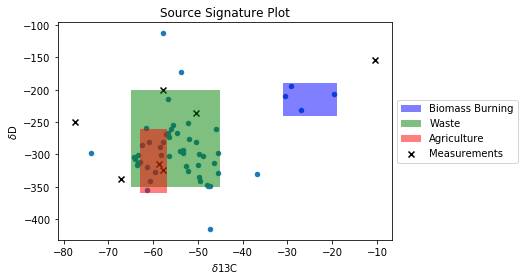

In [302]:
plt.figure()
ax = df_BiomassBurning.plot.scatter('d13C_CH4_MEAN', 'd2H_CH4_MEAN', stacked = False)
ax.add_patch(patches.Rectangle((-31,-240), 12, 50, angle=0.0, facecolor="blue", alpha=0.5, label= 'Biomass Burning'))
df_Waste2.plot.scatter('d13C_CH4_MEAN', 'd2H_CH4_MEAN', stacked = False, ax=ax)
ax.add_patch(patches.Rectangle((-65,-350), 20, 150, angle=0.0, facecolor="green", alpha=0.5, label= 'Waste'))
df_Waste.plot.scatter('Source d13C VPDB [‰]', 'Source dD SMOW [‰]', stacked = False, ax=ax)
df_Agriculture.plot.scatter('Source d13C VPDB [‰]', 'Source dD SMOW [‰]', stacked = False, ax=ax)
ax.add_patch(patches.Rectangle((-63,-360), 6, 100, angle=0.0, facecolor="red", alpha=0.5, label= 'Agriculture'))
plt.scatter(signature_x,signature_y,marker='x',linewidths=10,c='black',label='Measurements')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$\delta$13C')
plt.ylabel('$\delta$D')
plt.title('Source Signature Plot')

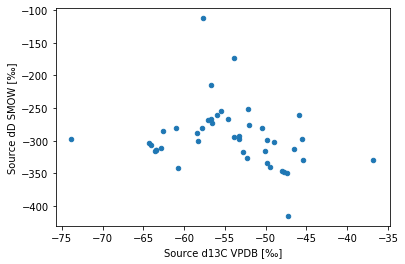

In [277]:
ax1 = df_Waste2.plot.scatter('d13C_CH4_MEAN', 'd2H_CH4_MEAN', stacked = False)
df_Waste.plot.scatter('Source d13C VPDB [‰]', 'Source dD SMOW [‰]', stacked = False, ax=ax1)